In [118]:
import numpy as np
import pandas as pd
import pyodbc
import sqlite3
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 
from scipy.stats import rv_discrete
from scipy.stats import t, binom, chi2, f

import importlib
import funciones_eda
importlib.reload(funciones_eda)
from funciones_eda import *

import importlib
import funciones_m
importlib.reload(funciones_m)
from funciones_m import *

import importlib
import funciones_distribucion
importlib.reload(funciones_distribucion)
from funciones_distribucion import *

In [119]:
url = 'df_filtrado.csv'
df = pd.read_csv(url, index_col=None)
df.drop('index', axis=1, inplace=True)

### Distribución normal

El diagrama QQ compara los cuantiles de los datos observados con los cuantiles de una distribución teórica (normal en este caso). Si los puntos caen cerca de la línea diagonal, significa que los datos siguen la distribución normal.

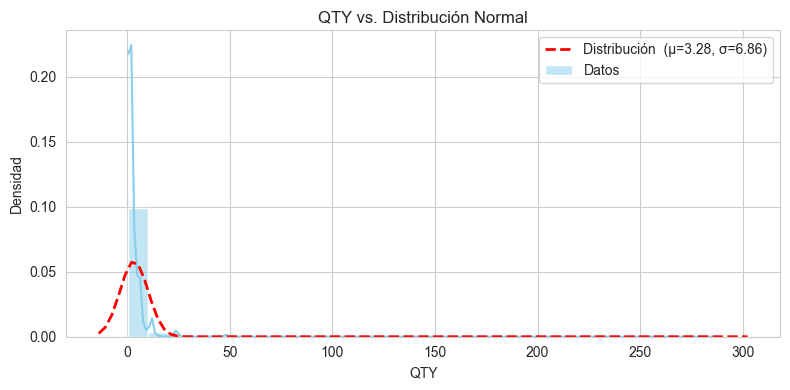

In [120]:
plot_normal_distribution(df, ['QTY'])

tienen una distribución altamente asimétrica hacia la derecha, con un fuerte pico en valores pequeños y una larga cola hacia valores altos.
La curva de distribución normal ajustada (línea roja discontinua) no representa bien los datos, ya que la distribución real es muy diferente de la forma de campana esperada de una normal.

Los datos no siguen una distribución normal.
La asimetría indica que los valores extremos (outliers) están presentes, lo que contribuye a la cola larga de la distribución.

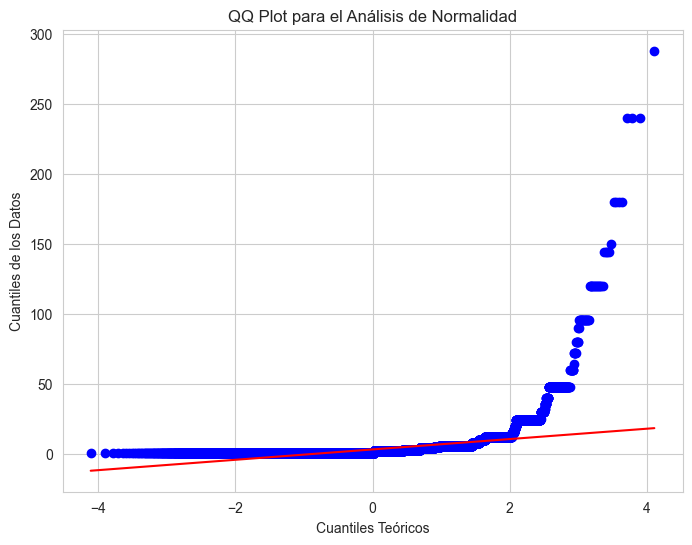

In [121]:
qq_plot(df['QTY'])

Los puntos azules en el gráfico QQ representan los cuantiles observados de los datos comparados con los cuantiles teóricos de una distribución normal (línea roja).
Los puntos se desvían significativamente de la línea roja, especialmente en los extremos.
Esto confirma que los datos no siguen una distribución normal. Los valores extremos (outliers) están contribuyendo al comportamiento observado

El diagrama QQ muestra una clara desviación de la normalidad, especialmente en los cuantiles superiores (cola derecha).
Esto confirma que los datos no se ajustan a una distribución normal y presentan asimetría.

### Muestreo aleatorio y sesgo de la muestra

### Distribución muestral de la media

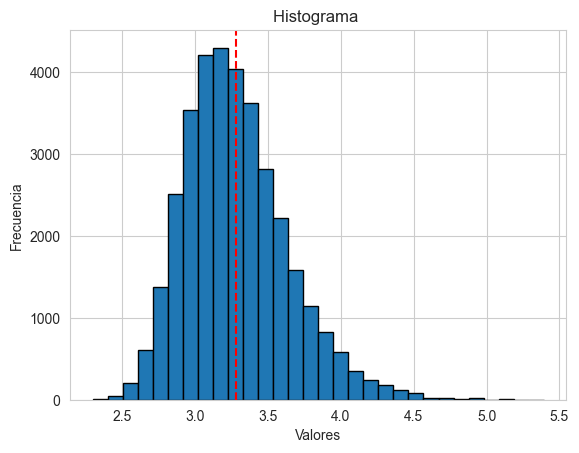

In [122]:
ditribucion_muestral_f,error_estandar_=ditribucion_muestral(df,'QTY')
histograma(ditribucion_muestral_f)

La distribución muestral de la media se ve simétrica y en forma de campana, lo que concuerda con el Teorema del Límite Central (TLC). Esto significa que incluso si los datos originales no eran normales, la distribución muestral de las medias tiende a ser normal a medida que el tamaño de muestra aumenta.

Al usar datos no normales, el TLC nos ayuda a aproximarnos a condiciones normales para trabajar con algoritmos estadísticos.

In [123]:
error_estandar_

0.018173357809306165

Este valor indica que, en promedio, las medias muestrales varían alrededor de la verdadera media poblacional por aproximadamente 0.01728 unidades .
Es un valor muy pequeño, lo que sugiere que las muestras son bastante consistentes y están muy cerca de los medios reales de la población.

In [124]:
resumen_distribucion(df,'QTY')

poblacion 34693
tamaño de la muestra 380
media poblacional 3.3
media aleatoria 3.2
error estandar 0.3
intervalo_confianza (2.5460640588974837, 3.8328833095235693)
La media poblacional está dentro del intervalo de confianza.


La media poblacional está dentro del intervalo de confianza , lo que sugiere que la estimación basada en la muestra es válida.
El error estándar es lo suficientemente pequeño para garantizar una buena precisión en la estimación.
No hay discrepancias significativas entre los medios poblacionales y los medios muestrales.
En resumen, los datos sugieren que la muestra fue adecuada para inferir sobre la población y que la media poblacional estimada de 3.3 es consistente con los resultados.


no hay evidencia de que la estimación en la muestra sea incorrecta o sesgada

### Remuestreo frente a bootstrapping 

Cuando seleccionas un elemento de la población, ese elemento ya no está disponible para que
Esto garantiza que los elementos en la muestra sean únicos .

In [125]:
muestrales_con_remplazo,muestrales_sin_remplazo=ditribucion_muestral_bossting(df,'QTY')

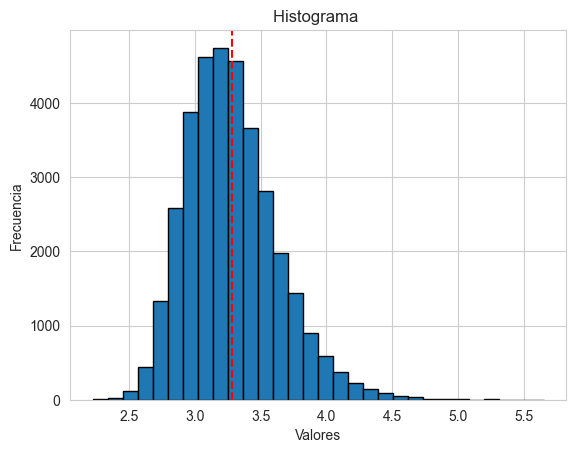

In [126]:
histograma(muestrales_sin_remplazo)

Ambas distribuciones tienen una forma de campana simétrica, lo que indica que siguen una distribución aproximadamente normal .
Esto es consistente con el Teorema del Límite Central , que estable

Sin reemplazo, las muestras son más representativas de la población porque todos los elementos seleccionados son únicos,

Ambas distribuciones son consistentes con el Teorema del Límite Central y proporcionan buenas estimaciones de los medios poblacionales.
Sin embargo:
Con reemplazo introduce más variabilidad en los medios muestrales, siendo útil en simulaciones como bootstrapping.
Sin reemplazo es más preciso y representativo cuando el tamaño de la muestra es comparable al tamaño de la población.

### Distribuciones de Cola Larga

Una **distribución de cola larga** se caracteriza por tener una alta frecuencia de eventos con valores pequeños o moderados, y una baja frecuencia de eventos con valores extremadamente grandes

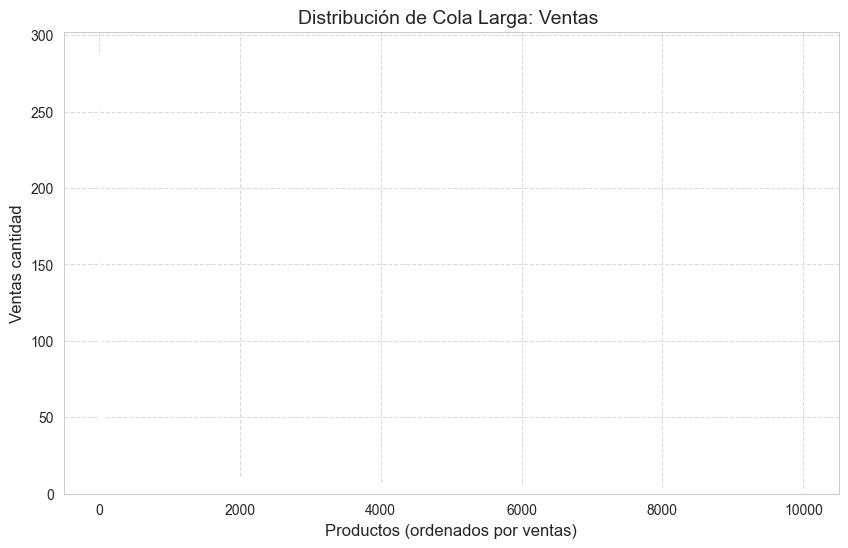

In [127]:
distribucion_cola_larga(df,'QTY')

La distribución es altamente sesgada hacia la derecha, indicando que la mayoría de las ventas se concentran en valores pequeños mientras que un número reducido de registros tiene valores muy grandes.

La mayoría de los registros tienen valores de QTYbajos, lo cual es evidente por la fuerte caída inicial en el gráfico.
 los pedidos individuales suelen ser pequeños o representan productos de baja demanda.

Algunos registros tienen valores QTYsignificativamente altos, lo que genera la "cola larga" en el gráfico. Estos valores corresponden a pedidos grandes o atípicos.

### Distribución t de Student, binomial, chi cuadrado, F

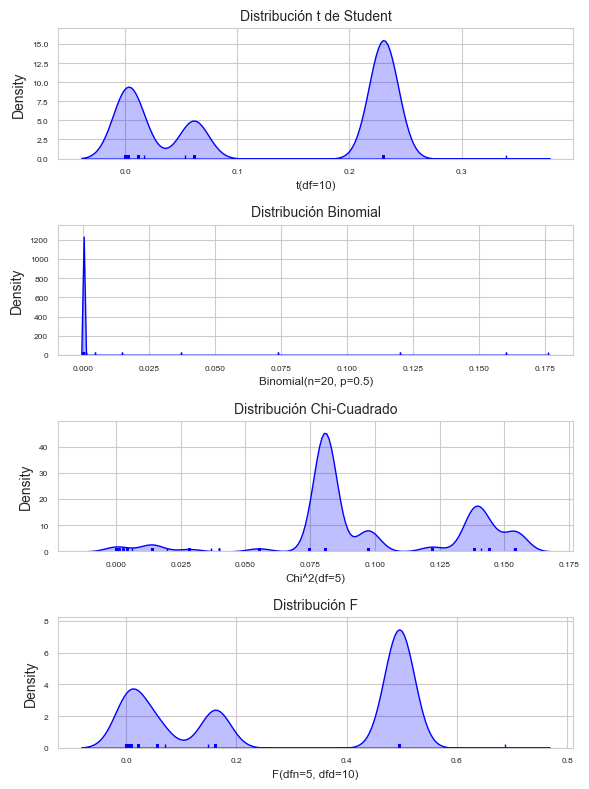

In [128]:
distribuciones_personalizadas(df, 'QTY')

student: Parece que hay múltiples picos o agrupaciones. Esto puede indicar que los datos no siguen una distribución t clásica.

os datos parecen tener una estructura más compleja. Es posible que haya subgrupos

binomial: La distribución es sesgada hacia valores bajos, con una gran concentración al inicio. por lo que indica que los datos tienen una gran cantidad de valores cercanos a cero.

Chi-Cuadrado: Tiene una acumulación inicial y un pico más definido en valores intermedios, pero también múltiples picos secundarios.

Ninguna de las distribuciones teóricas (t, binomial, chi-cuadrado, F) parece representar adecuadamente la variable cantidad

Realizar un análisis exploratorio para identificar patrones o valores atípicos que puedan influir en las distribuciones.

**recomendacion**

Examinar la variable cantidad para identificar segmentos, valores atípicos o agrupaciones que puedan explicar la complejidad de los datos.
Aplicar técnicas como clustering para agrupar registros en función de patrones similares.

Probar transformaciones como logaritmo o raíz cuadrada para reducir la asimetría y facilitar el ajuste a distribuciones más estándar.

Considerar distribuciones no paramétricas o ajustadas específicamente a los datos.
Realizar pruebas de bondad de ajuste para validar qué distribución representa mejor los datos.

Analizar por separado los valores en la cola larga, ya que pueden representar un comportamiento diferente (como pedidos excepcionales o eventos no habituales

En resumen, los datos presentan una estructura compleja, con asimetría significativa y valores extremos que dificultan el ajuste a distribuciones teóricas. Es fundamental realizar un análisis más profundo para segmentar los datos, aplicar transformaciones y explorar modelos no paramétricos que reflejen mejor su naturaleza.